         Date Slot No.  Alpha_Sensor   PMS_A003       Temp     RelHum
0  16-12-2021  SLOT-13     19.679310  73.136364  42.937931  25.986207
1  16-12-2021  SLOT-14     19.352167  65.406780  37.216667  30.165000
2  16-12-2021  SLOT-15     17.695254  62.711864  36.057627  31.477966
3  16-12-2021  SLOT-16     16.403500  60.913793  35.470000  31.477966
4  16-12-2021  SLOT-17     28.924237  78.543860  34.900000  35.988136
Loss functions:
* R-squared = -53.73912263476365
* RMSE = 64.59227106885645
* MAE = 61.08746445185882
         Date Slot No.  Alpha_Sensor   PMS_A003       Temp     RelHum
0  16-12-2021  SLOT-13     19.679310  73.136364  42.937931  25.986207
1  16-12-2021  SLOT-14     19.352167  65.406780  37.216667  30.165000
2  16-12-2021  SLOT-15     17.695254  62.711864  36.057627  31.477966
3  16-12-2021  SLOT-16     16.403500  60.913793  35.470000  31.477966
4  16-12-2021  SLOT-17     28.924237  78.543860  34.900000  35.988136
Date             object
Slot No.         object
Alpha_Sens

<ipython-input-1-b16d11518cf5>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PMS_A003_Alpha_Sensor_factor["Alpha_Sensor"] = 4*PMS_A003_Alpha_Sensor_factor["Alpha_Sensor"]


Correlation:  0.6160197751565606


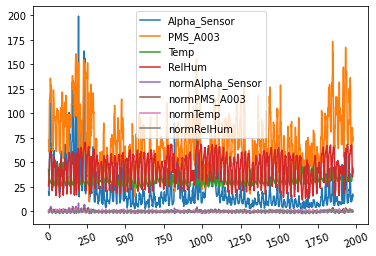

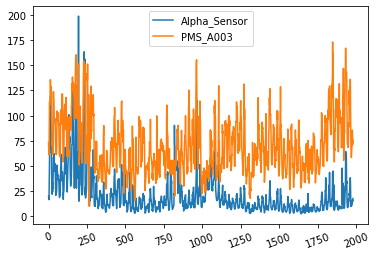

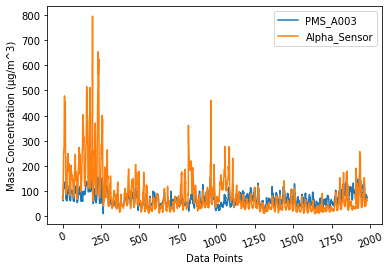

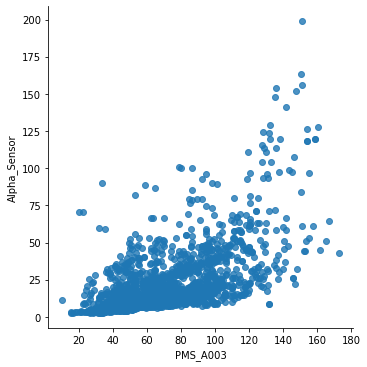

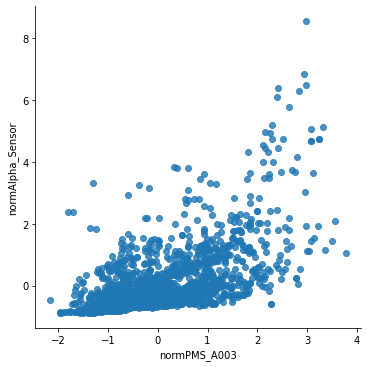

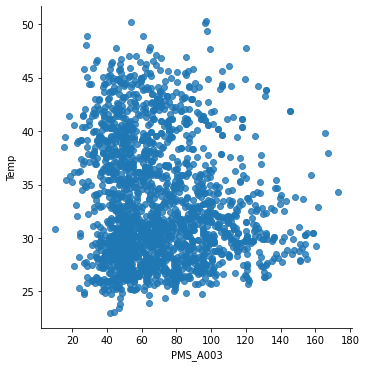

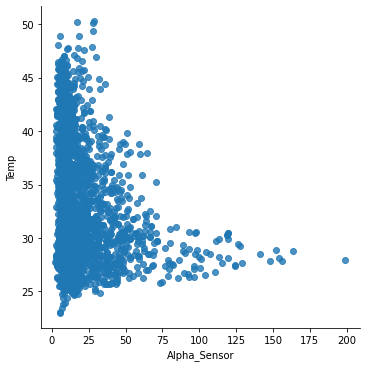

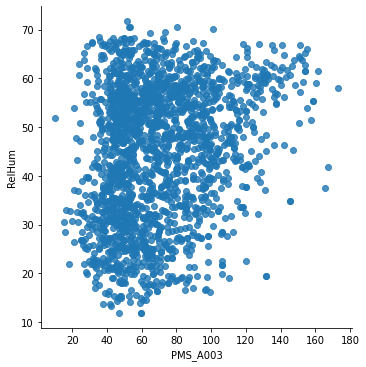

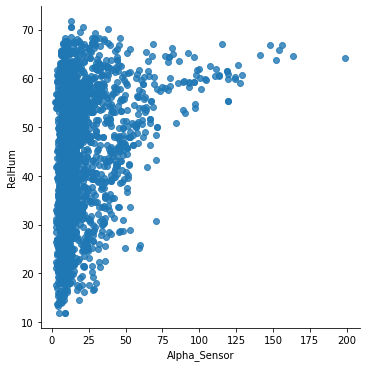

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime
import math

#%%
# Read sensor data
sensor = pd.read_csv("PM2.5_RM.csv")
print(sensor.head())

# Build main dataset
df = pd.DataFrame({'Alpha_Sensor': sensor["Alpha_Sensor"], 'PMS_A003': sensor["PMS_A003"], 'Temp': sensor["Temp"], 'RelHum': sensor["RelHum"]})

# Split main dataset and build train and test datasets
X = df[['PMS_A003', 'Temp', 'RelHum']]
Y = df['Alpha_Sensor']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'Alpha_Sensor': Y_train, 'PMS_A003': X_train["PMS_A003"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"]})
df_test = pd.DataFrame({'Alpha_Sensor': Y_test, 'PMS_A003': X_test["PMS_A003"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"]})

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    MSE = mean_squared_error(y_true, y_pred)
    print("* RMSE =", math.sqrt(MSE))
    print("* MAE =", mean_absolute_error(y_true, y_pred))
    
# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["PMS_A003"])

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normAlpha_Sensor"] = normalize(df["Alpha_Sensor"])
df["normPMS_A003"] = normalize(df["PMS_A003"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
Temp_PMS_A003 = sensor[["Temp", "PMS_A003"]]
print(Temp_PMS_A003.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["Alpha_Sensor", "PMS_A003"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
PMS_A003_Alpha_Sensor_factor = df[["PMS_A003", "Alpha_Sensor"]]
PMS_A003_Alpha_Sensor_factor["Alpha_Sensor"] = 4*PMS_A003_Alpha_Sensor_factor["Alpha_Sensor"]
PMS_A003_Alpha_Sensor_factor.plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'PMS_A003', y = 'Alpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normPMS_A003', y = 'normAlpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to PMS_A003
sns.lmplot(x = 'PMS_A003', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to PMS_A003
sns.lmplot(x = 'PMS_A003', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)

y = df["PMS_A003"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 -76.67035974158146
Coefficients: 
 [0.54780343 1.04972485 0.66867401]
Loss functions:
* R-squared = -5.087910141402882
* RMSE = 21.540994771265684
* MAE = 18.186915624026714
Intercept: 
 [24.72201422]
Coefficients: 
 [14.78484597  3.05639899  6.0833975 ]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = -4.1708630179583075
* RMSE = 19.85240630535605
* MAE = 16.835189671169
Correlation_MLR_Pred:  0.8233963145411008
Correlation_MLR_SGD_Pred:  0.8322971241617303


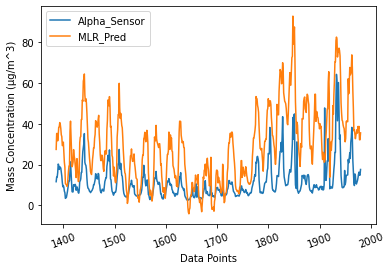

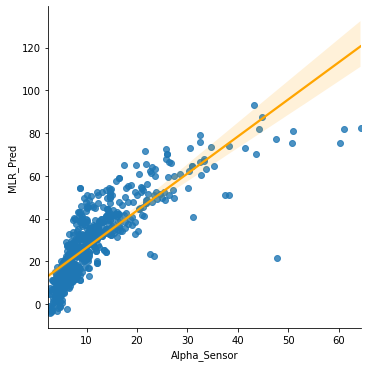

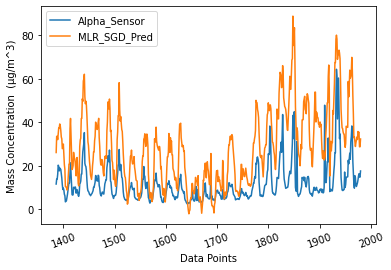

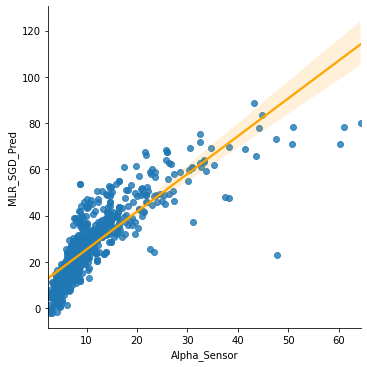

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["PMS_A003"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["Alpha_Sensor", "MLR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "MLR_SGD_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration  (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_SGD_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_SGD_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_MLR_Pred = df_test["MLR_Pred"].corr(x)
corr_MLR_SGD_Pred = df_test["MLR_SGD_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)
print("Correlation_MLR_SGD_Pred: ", corr_MLR_SGD_Pred)

      Alpha_Sensor   PMS_A003       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1386     11.553750  75.491525  42.764286  26.698214  27.427292     26.042237   
1387     13.813929  85.711864  40.630357  33.387500  35.258942     33.487259   
1388     13.813929  85.711864  40.630357  33.387500  35.258942     33.487259   
1389     16.044038  89.508475  38.286538  28.548077  31.642377     31.984213   
1390     20.225185  93.551724  36.014815  32.824074  34.331847     34.882314   
...            ...        ...        ...        ...        ...           ...   
1976     15.161000  85.644068  40.686667  36.980000  37.683124     35.148001   
1977     16.276333  85.135593  43.206667  35.005000  38.729255     35.373730   
1978     14.746500  71.275862  42.481667  37.700000  32.177873     28.698291   
1979     14.746500  71.275862  42.481667  37.700000  32.177873     28.698291   
1980     17.562000  75.559322  39.293333  44.260000  35.563996     32.270242   

       KNN_Pred  
1386  14.991845  
138

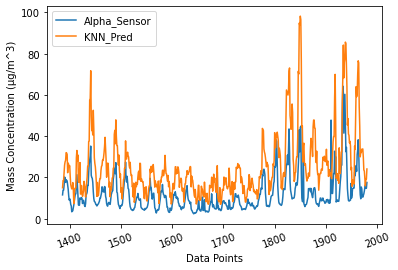

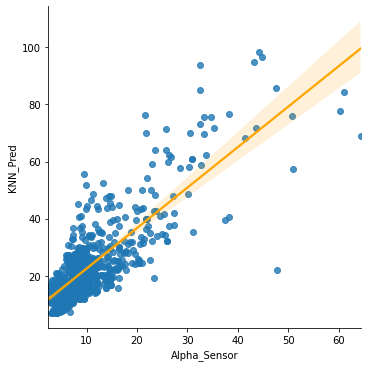

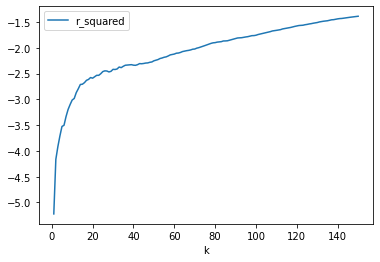

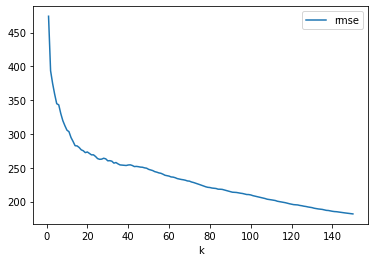

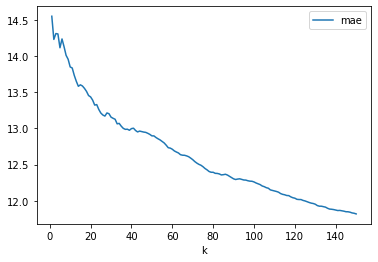

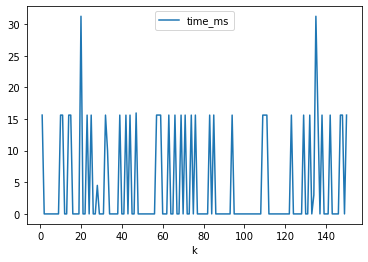

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "KNN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_KNN_Pred = df_test["KNN_Pred"].corr(x)
print("Correlation_KNN_Pred: ", corr_KNN_Pred)

      Alpha_Sensor   PMS_A003       Temp     RelHum   MLR_Pred  MLR_SGD_Pred  \
1386     11.553750  75.491525  42.764286  26.698214  27.427292     26.042237   
1387     13.813929  85.711864  40.630357  33.387500  35.258942     33.487259   
1388     13.813929  85.711864  40.630357  33.387500  35.258942     33.487259   
1389     16.044038  89.508475  38.286538  28.548077  31.642377     31.984213   
1390     20.225185  93.551724  36.014815  32.824074  34.331847     34.882314   
...            ...        ...        ...        ...        ...           ...   
1976     15.161000  85.644068  40.686667  36.980000  37.683124     35.148001   
1977     16.276333  85.135593  43.206667  35.005000  38.729255     35.373730   
1978     14.746500  71.275862  42.481667  37.700000  32.177873     28.698291   
1979     14.746500  71.275862  42.481667  37.700000  32.177873     28.698291   
1980     17.562000  75.559322  39.293333  44.260000  35.563996     32.270242   

       KNN_Pred    RF_Pred  
1386  14.9

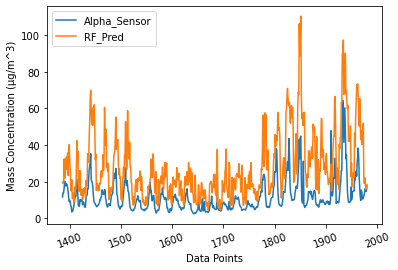

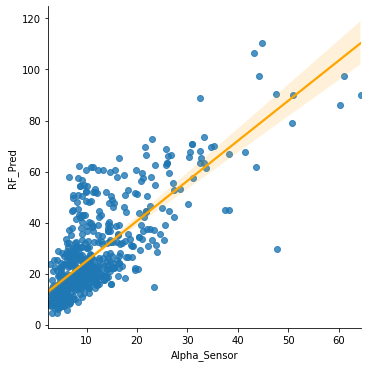

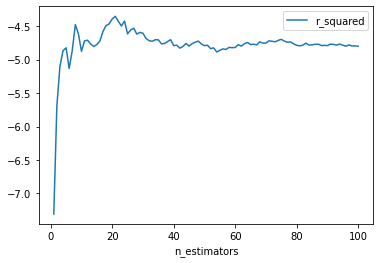

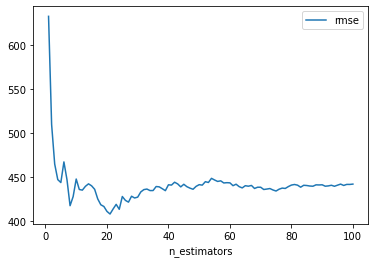

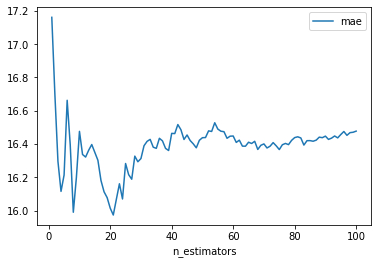

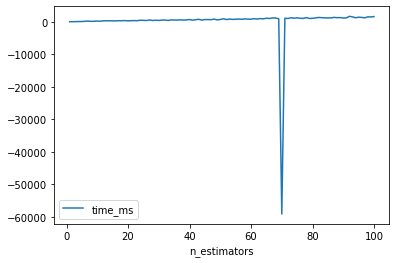

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "RF_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["Alpha_Sensor"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

In [ ]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, WhiteKernel

# Kernels definition
# rbf = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-10, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
rbf = ConstantKernel() * RBF()
dpwh = DotProduct() + WhiteKernel()

# Models
gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = 150, random_state = 0)
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_rbf.fit(X_train, Y_train)
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_RBF_Pred"] = gp_rbf.predict(X_test)
df_test["GP_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("RBF params", gp_rbf.get_params())
print("Dot params", gp_dpwh.get_params())

# Plot linear
df_test[["Alpha_Sensor", "GP_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'GP_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'GP_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["GP_RBF_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["GP_Pred"])


# %%
# Gaussian Process stats vs. hyperparameters
def gp_stats():
    gp_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    alpha = [*range(20, 202, 2)]
    # alpha = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,50,100,150,200]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    rbf = ConstantKernel() * RBF()

    for i in alpha:
        gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = i, random_state = 0)
        # gp = GaussianProcessRegressor(kernel=rbf, alpha=i, random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        gp_rbf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        gp_aux["GP_RBF_Pred"] = gp_rbf.predict(X_test)

        # Loss
        r_squared.append(r2_score(gp_aux["Alpha_Sensor"], gp_aux["GP_RBF_Pred"]))
        rmse.append(mean_squared_error(gp_aux["Alpha_Sensor"], gp_aux["GP_RBF_Pred"]))
        mae.append(mean_absolute_error(gp_aux["Alpha_Sensor"], gp_aux["GP_RBF_Pred"]))
        time_ms.append(execution_time)

    gp_stats = pd.DataFrame({'alpha': alpha, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    gp_stats = gp_stats.set_index('alpha') # index column (X axis for the plots)
    print(gp_stats)

    # plot
    gp_stats[["r_squared"]].plot()
    gp_stats[["rmse"]].plot()
    gp_stats[["mae"]].plot()
    gp_stats[["time_ms"]].plot()

gp_stats()

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["GP_Pred"].corr(x)
print("Correlation: ", corr)

RBF params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': 1**2, 'kernel__k2': RBF(length_scale=1), 'kernel__k1__constant_value': 1.0, 'kernel__k1__constant_value_bounds': (1e-05, 100000.0), 'kernel__k2__length_scale': 1.0, 'kernel__k2__length_scale_bounds': (1e-05, 100000.0), 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Dot params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}


In [ ]:
# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "SVR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
# loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Pred"])
# loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Poly_Pred"])


# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_NN = df_test["NN_Pred"].corr(x)
corr_lin = df_test["SVR_Pred"].corr(x)
print("Correlation_NN: ", corr_NN)
print("Correlation_corr_lin: ", corr_lin)

In [ ]:
# %%
# Neural Network - TF
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

# Normalise data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
nn = Sequential()

# Model - Layers
nn.add(InputLayer(input_shape = (3))) # Input layer
nn.add(Dense(units = 64, activation = 'relu')) # 1st hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 2nd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 3rd hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 4th hidden layer
nn.add(Dense(units = 64, activation = 'relu')) # 5th hidden layer
nn.add(Dense(units = 1)) # Output layer

nn.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit
history = nn.fit(X_train, Y_train, batch_size = 10, epochs = 750)

# Plot loss
plt.plot(history.history['loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict
df_test["NN_Pred"] = nn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["NN_Pred"].corr(x)
print("Correlation: ", corr)